In [2]:
import eleanor
import lightkurve as lk 
from IPython.display import clear_output
import pandas as pd
import numpy as np
import pickle
from os import listdir
import warnings
import matplotlib.pyplot as plt
from tqdm import tqdm
from astroquery.mast import Catalogs
warnings.filterwarnings('ignore')

In [4]:
tic = 288051845

In [5]:
#gaia = 6741361533726507008 # This is the original star that we were observing
gaia = 6741361533726511104 # This is the correct label
#gaia = 6622795899205157248 # This is other candidates

star = eleanor.multi_sectors(sectors='all',tic=tic ,coords=(295.707552,-35.233526),tc=True)
#star = eleanor.multi_sectors(sectors='all',tic=tic,tc=True)

full_lc = lk.LightCurve([],[])
data_objects = []
original_curve_objects = []
medians = []
for observation in star:
    data = eleanor.TargetData(observation,bkg_size=51)
    #data.custom_aperture(shape='circle', r=3, method='exact')
    #data.get_lightcurve()
    data_objects.append(data)
    
    lc = data.to_lightkurve(flux=data.pca_flux)
    original_curve_objects.append(lc)
    medians.append(np.median(lc.flux))
    lc.flux = lc.flux - np.median(lc.flux)
    full_lc = full_lc.append(lc)
full_lc.flux = full_lc.flux + np.median(medians)

Found star in Sector(s) 13 27


1.8227822782278227 d


<Figure size 432x288 with 0 Axes>

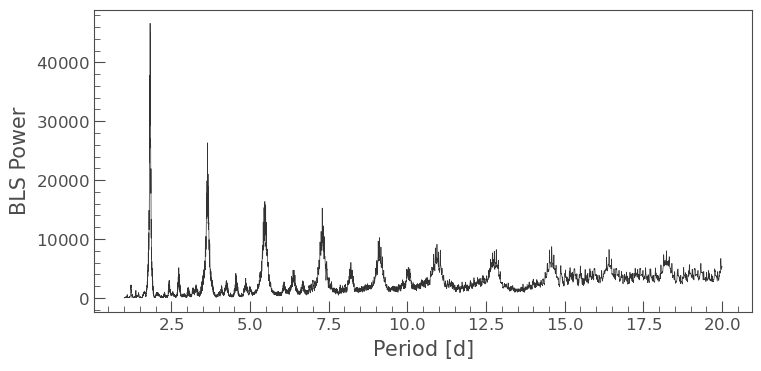

<Figure size 432x288 with 0 Axes>

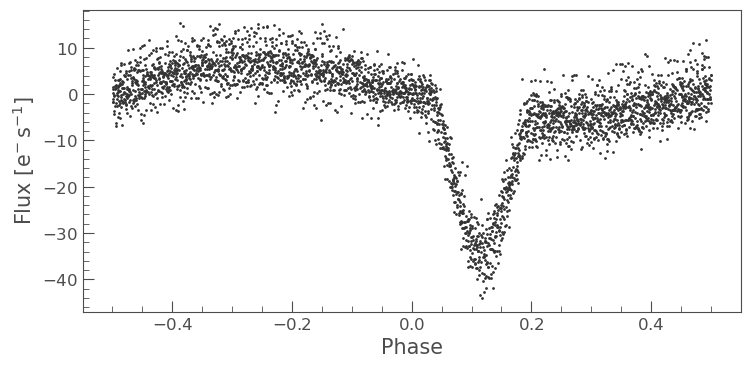

In [6]:
period = np.linspace(1, 20, 10000)
bls = full_lc.to_periodogram(method='bls', period=period, frequency_factor=500)
plt.figure()
bls.plot()

planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
print(planet_period)

plt.figure()
ax = lc.fold(period=1*planet_period).scatter()

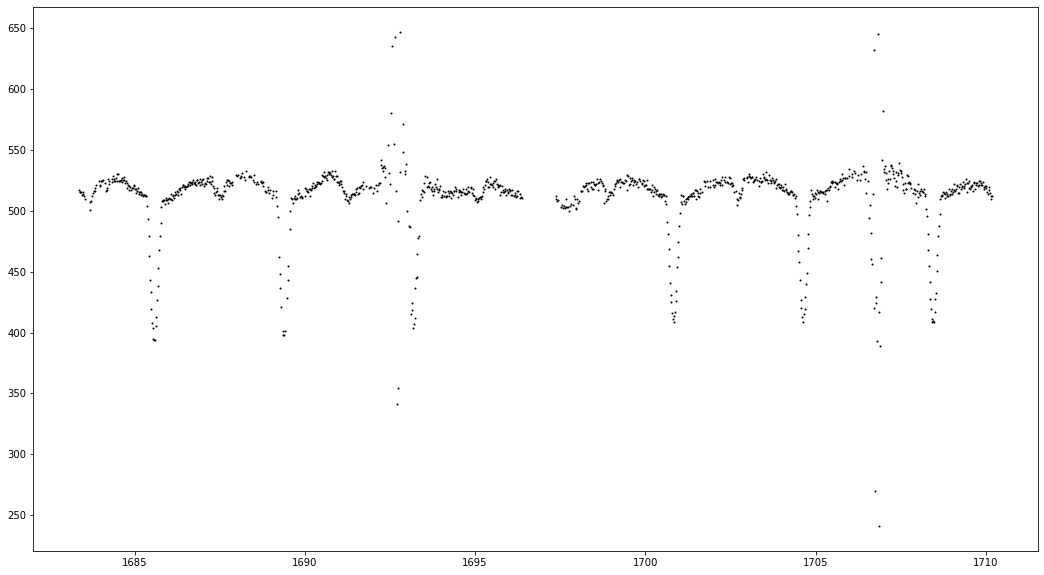

In [9]:
lc = full_lc.flatten()
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.scatter(full_lc.time,full_lc.flux,s=1,c='black')
#ax.set_ylim(19,25)
#ax.set_xlim(2000,2400)

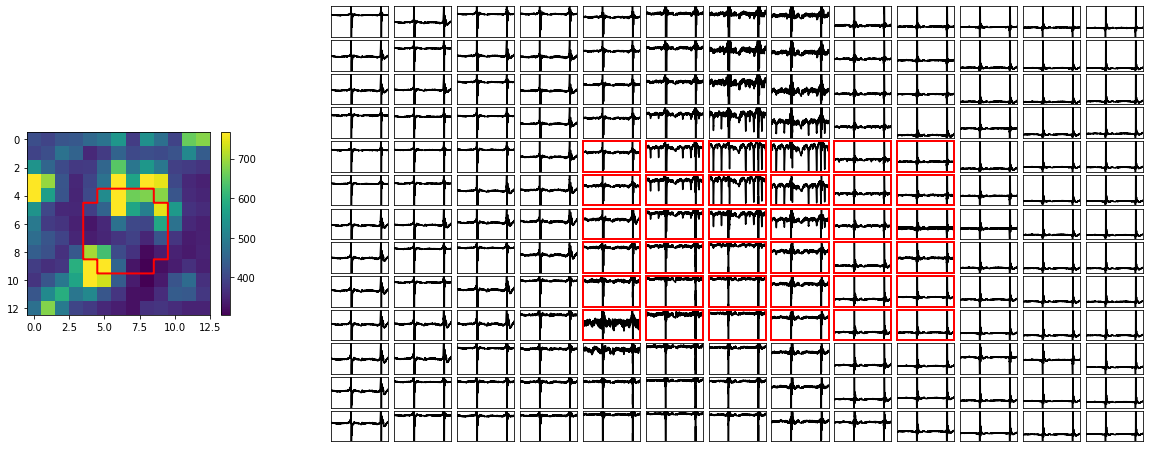

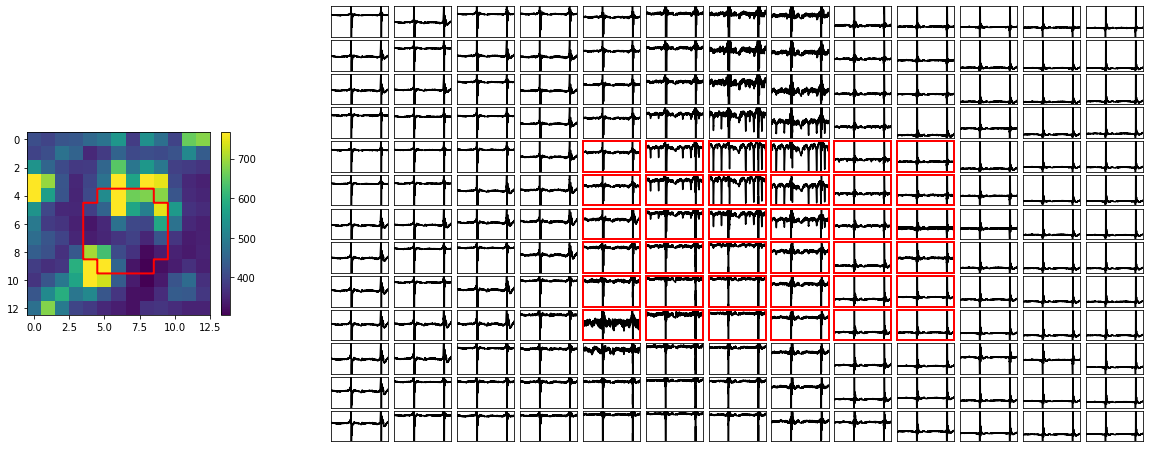

In [88]:
data = data_objects[0]
vis = eleanor.Visualize(data)
vis.pixel_by_pixel()

<AxesSubplot:title={'center':'TIC 114279734'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

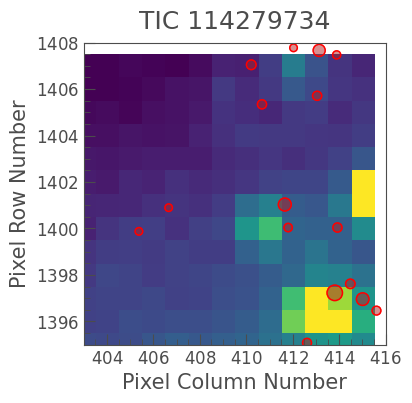

In [10]:
vis.plot_gaia_overlay(magnitude_limit=17)

In [47]:
catalog_data = Catalogs.query_object("295.7150236 -35.2395776", radius = 3 * 0.00583, catalog="TIC").to_pandas()

ID          ra        dec       pmRA      pmDEC     Tmag objType  \
0    114279734  295.715024 -35.239578   3.662510  -2.055140  17.6909    STAR   
1    114281118  295.711153 -35.239982 -11.476600 -18.216600  18.0263    STAR   
2   1925579310  295.721367 -35.236454   1.763220 -16.399500  19.8127    STAR   
3   1925579304  295.722477 -35.239325  -1.561480  -3.937150  19.0298    STAR   
4    114281113  295.709852 -35.243994  16.217000  17.327400  19.1367    STAR   
5    114281126  295.717139 -35.232561 -14.905400 -10.473600  18.7983    STAR   
6   1925579305  295.723738 -35.242776  -2.699190 -10.246900  20.3615    STAR   
7    114281124  295.707552 -35.233526  -1.817330  -6.333290  12.9883    STAR   
8   1925579303  295.703234 -35.243479  -0.827166  -8.482260  19.3548    STAR   
9   1925579302  295.706867 -35.249716        NaN        NaN  20.5764    STAR   
10  1925579311  295.720208 -35.226352  -2.794260  -7.734480  19.5458    STAR   
11   114281130  295.704874 -35.228212   9.852020  -6.429300  15.4690    STAR   
12  1925579312  295.716610 -35.225160  -7.863730   0.854043  18.8778    STAR   
13  1925579294  295.716305 -35.254653  -2.343890   0.384850  19.8526    STAR   
14   114281120  295.733949 -35.237646  -2.832340  -1.761920  17.5186    STAR   
15   114279723  295.700951 -35.229012  -2.183530  -4.299530  17.6761    STAR   
16  1925579321  295.697804 -35.232200   0.916351  -0.509171  20.5184    STAR   
17  1925579299  295.703937 -35.253360  -5.952240 -11.296000  19.8824    STAR   
18  1925579300  295.702828 -35.252891 -13.205300  -6.974940  19.9335    STAR   
19  1925579295  295.720032 -35.256024        NaN        NaN  20.5261    STAR   
20   114281104  295.721245 -35.256224   6.128690  -9.195440  15.0981    STAR   

    typeSrc   version  HIP  ... splists       e_RA      e_Dec     RA_orig  \
0   tmgaia2  20190415  NaN  ...     NaN   4.768935   3.390677  295.715043   
1   tmgaia2  20190415  NaN  ...     NaN   6.975219   5.068735  295.711093   
2     gaia2  20190415  NaN  ...     NaN  19.235391  14.314074  295.721376   
3     gaia2  20190415  NaN  ...     NaN  12.275924   9.085322  295.722468   
4   tmgaia2  20190415  NaN  ...     NaN  78.040511  74.370811  295.709937   
5   tmgaia2  20190415  NaN  ...     NaN  59.242662  56.460547  295.717060   
6     gaia2  20190415  NaN  ...     NaN  50.351114  48.691241  295.723724   
7   tmgaia2  20190415  NaN  ...     NaN   0.758021   0.469222  295.707542   
8     gaia2  20190415  NaN  ...     NaN  14.252400  10.765813  295.703230   
9     gaia2  20190415  NaN  ...     NaN   4.293814   1.944332  295.706867   
10    gaia2  20190415  NaN  ...     NaN  15.694282  11.780905  295.720193   
11  tmgaia2  20190415  NaN  ...     NaN   1.614317   1.044972  295.704926   
12    gaia2  20190415  NaN  ...     NaN  11.573170   8.362194  295.716568   
13    gaia2  20190415  NaN  ...     NaN  24.716928  18.303633  295.716293   
14  tmgaia2  20190415  NaN  ...     NaN   4.583345   3.169416  295.733934   
15  tmgaia2  20190415  NaN  ...     NaN   5.067786   3.562536  295.700940   
16    gaia2  20190415  NaN  ...     NaN  59.890605  32.256749  295.697809   
17    gaia2  20190415  NaN  ...     NaN  24.506288  16.579212  295.703905   
18    gaia2  20190415  NaN  ...     NaN  23.625378  17.085275  295.702758   
19    gaia2  20190415  NaN  ...     NaN  24.983221  25.209359  295.720032   
20  tmgaia2  20190415  NaN  ...     NaN   1.307126   0.823460  295.721277   

     Dec_orig  e_RA_orig e_Dec_orig raddflag wdflag  dstArcSec  
0  -35.239586   0.157540   0.124442        1      0   0.000126  
1  -35.240061   0.235488   0.188059        1      0  11.472247  
2  -35.236525   0.637327   0.542153        1      0  21.778442  
3  -35.239342   0.419605   0.339259        1      0  21.932903  
4  -35.243919   0.515049   0.420805        1      0  22.000294  
5  -35.232606   0.421911   0.339663        1      0  26.014502  
6  -35.242821   1.626828   2.073768        1      0  28.091582  
7  -35.233553   0.021550   0.015290 

Found star in Sector(s) 11
Inflating...
15.646664666466647 d
Your target is not observed by TESS, or maybe you need to run eleanor.Update()
Found star in Sector(s) 6
Inflating...
1.1273127312731273 d
Found star in Sector(s) 15
Inflating...
13.687568756875686 d
Found star in Sector(s) 12
Inflating...
13.854785478547855 d
Your target is not observed by TESS, or maybe you need to run eleanor.Update()
Your target is not observed by TESS, or maybe you need to run eleanor.Update()
Your target is not observed by TESS, or maybe you need to run eleanor.Update()
Found star in Sector(s) 12
Inflating...
15.101310131013102 d
Your target is not observed by TESS, or maybe you need to run eleanor.Update()
Could not resolve tic789421875 to a sky position.
Could not resolve tic572605575 to a sky position.
Could not resolve tic838307154 to a sky position.
Found star in Sector(s) 18 24 25
Inflating...
Inflating...
Inflating...
8.393639363936394 d
Found star in Sector(s) 5
Inflating...
12.688068806880686 d

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

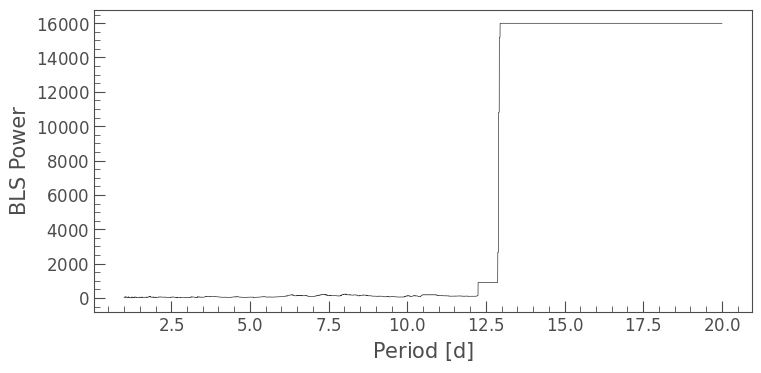

<Figure size 432x288 with 0 Axes>

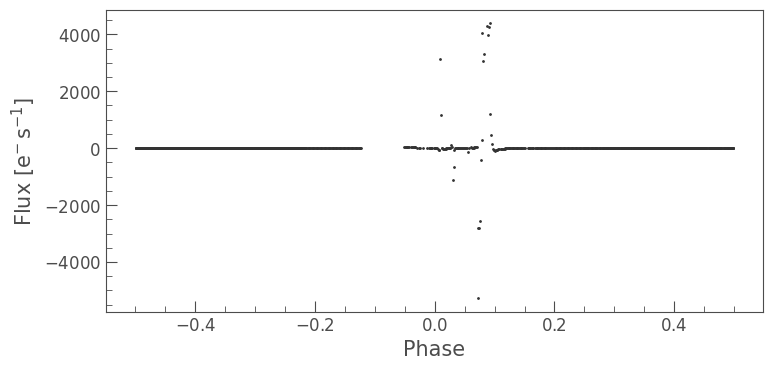

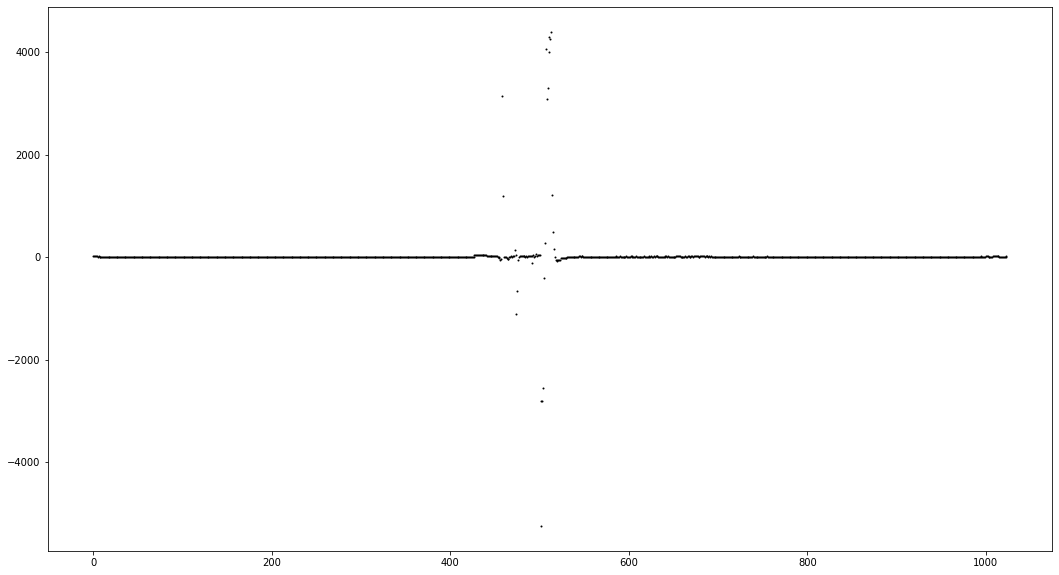

<Figure size 432x288 with 0 Axes>

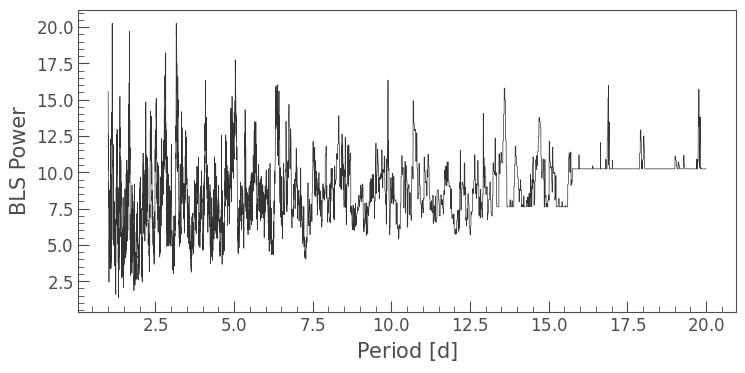

<Figure size 432x288 with 0 Axes>

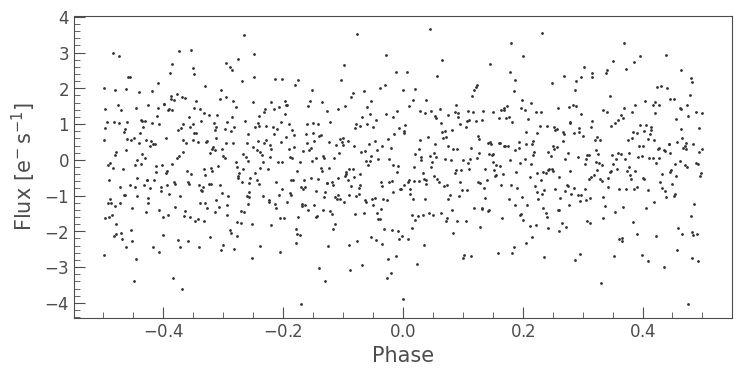

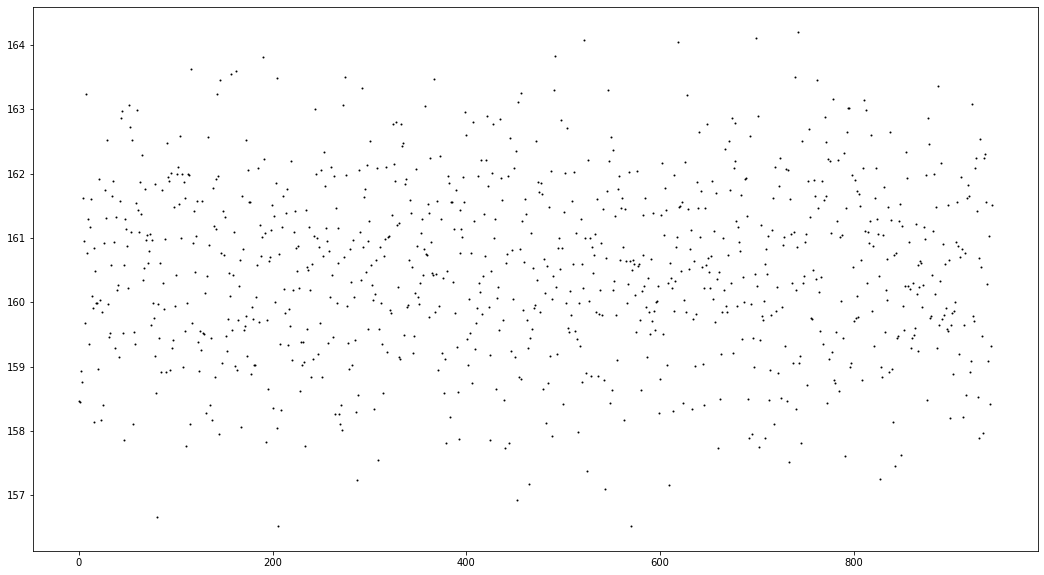

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x0000020F75FDF0D8> (for post_execute):


KeyboardInterrupt: 

In [100]:
while True:
    try:
        tic = np.random.random_integers(low=100000000,high=999999999)
        star = eleanor.multi_sectors(sectors='all',tic=tic,tc=True)

        full_lc = lk.LightCurve([],[])
        data_objects = []
        original_curve_objects = []
        medians = []
        for observation in star:
            data = eleanor.TargetData(observation,bkg_size=15)
            data_objects.append(data)

            lc = data.to_lightkurve(flux=data.corr_flux)
            original_curve_objects.append(lc)
            medians.append(np.median(lc.flux))
            lc.flux = lc.flux - np.median(lc.flux)
            full_lc = full_lc.append(lc)
        full_lc.flux = full_lc.flux + np.median(medians)
        
        period = np.linspace(1, 20, 10000)
        bls = full_lc.to_periodogram(method='bls', period=period, frequency_factor=500)
        plt.figure()
        bls.plot()
        plt.savefig('E:/vis/planets/lc/' + str(tic) + 'bls.jpg')
        
        planet_period = bls.period_at_max_power
        planet_t0 = bls.transit_time_at_max_power
        print(planet_period)

        plt.figure()
        ax = lc.fold(period=1*planet_period).scatter()
        plt.savefig('E:/vis/planets/lc/' + str(tic) + 'fld.jpg')
        lc = full_lc.flatten()
        
        plt.figure(figsize=(18,10))
        ax = plt.subplot()
        ax.scatter(range(len(full_lc.flux)),full_lc.flux,s=1,c='black')
        plt.savefig('E:/vis/planets/lc/' + str(tic) + 'ful.jpg')
        
        
    except Exception as e:
        print(str(e))
        continue